<a href="https://colab.research.google.com/github/Hujaifa98/AIProjects/blob/main/CIFAR_10_using_CNN(inception).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets,layers,models

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train , x_test = x_train/255.0 , x_test/255.0
y_train , y_test = y_train.flatten() , y_test.flatten()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
def inception(x,filter_1x1,filter_3x3_r,filter_3x3,filter_5x5_r,filter_5x5,filter_pool):
  path1 = keras.layers.Conv2D(filter_1x1,(1,1),padding='same',activation='relu')(x)

  path2 = keras.layers.Conv2D(filter_3x3_r,(1,1),padding='same',activation='relu')(x)
  path2 = keras.layers.Conv2D(filter_3x3,(3,3),padding='same',activation='relu')(path2)

  path3 = keras.layers.Conv2D(filter_5x5_r,(1,1),padding='same',activation='relu')(x)
  path3 = keras.layers.Conv2D(filter_5x5,(1,1),padding='same',activation='relu')(path3)

  path4 = keras.layers.MaxPool2D((3,3),(1,1),padding='same')(x)
  path4 = keras.layers.Conv2D(filter_pool,(1,1),padding='same',activation='relu')(path4)

  return tf.concat([path1,path2,path3,path4],axis=3)

In [ ]:
i = keras.layers.Input(x_train[0].shape)
x = keras.layers.Conv2D(32,(7,7),(2,2),padding='same',activation='relu')(i)
x = keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(x)
x = keras.layers.MaxPool2D((3,3),(2,2))(x)
x = keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(x)
x = keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(x)
x = keras.layers.MaxPool2D((3,3),(2,2))(x)
x = inception(x, 64, 96, 128, 16, 32, 32)
x = inception(x, 128, 128, 192, 32, 96, 64)
x = keras.layers.MaxPool2D((3,3),(2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(1024,'relu',kernel_regularizer=keras.regularizers.L2())(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(10,'softmax')(x)
model = keras.models.Model(i,x)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 32)   4736        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 16, 16, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 7, 7, 64)     0           ['conv2d_1[0][0]']               
                                                                                              

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1563/1563 [==============================] - 247s 157ms/step - loss: 1.9623 - accuracy: 0.2921 - val_loss: 1.5056 - val_accuracy: 0.4575
Epoch 2/20
1563/1563 [==============================] - 239s 153ms/step - loss: 1.4667 - accuracy: 0.4863 - val_loss: 1.3318 - val_accuracy: 0.5415
Epoch 3/20
1563/1563 [==============================] - 241s 154ms/step - loss: 1.2791 - accuracy: 0.5697 - val_loss: 1.2231 - val_accuracy: 0.5900
Epoch 4/20
1563/1563 [==============================] - 236s 151ms/step - loss: 1.1519 - accuracy: 0.6210 - val_loss: 1.2289 - val_accuracy: 0.6020
Epoch 5/20
1563/1563 [==============================] - 240s 153ms/step - loss: 1.0492 - accuracy: 0.6578 - val_loss: 1.0754 - val_accuracy: 0.6483
Epoch 6/20
1563/1563 [==============================] - 239s 153ms/step - loss: 0.9798 - accuracy: 0.6866 - val_loss: 1.0663 - val_accuracy: 0.6594
Epoch 7/20
1563/1563 [==============================] - 240s 154ms/step - loss: 0.9130 - accuracy: 0.7119 - val_

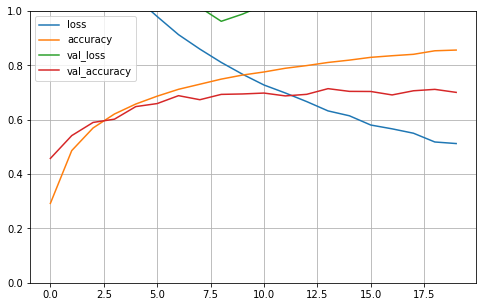

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

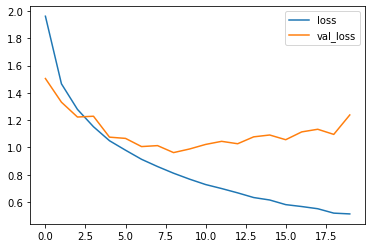

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

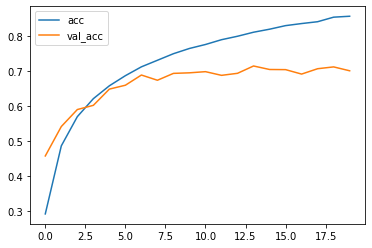

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()